importer les bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

On lit le fichier CSV contenant les données historiques du niveau de la mer

In [2]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df.head(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


Créer un graphique de dispersion

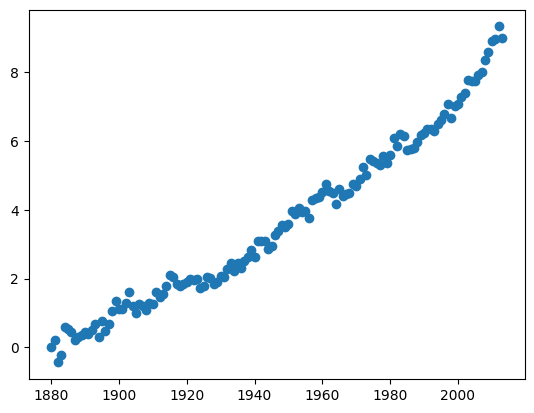

In [4]:
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Data")

Tracer la ligne de tendance globale (1880-2050)

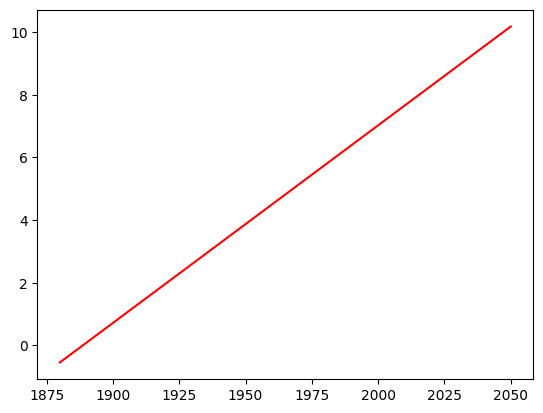

In [5]:
slope, intercept, _, _, _ = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
years_extended = pd.Series(range(1880, 2051))
sea_levels_pred = intercept + slope * years_extended
plt.plot(years_extended, sea_levels_pred, 'r', label="Best Fit Line (1880-2050)")

Tracer une nouvelle ligne de tendance depuis 2000

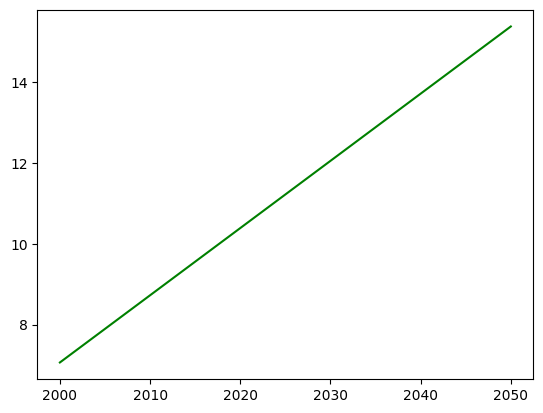

In [6]:
df_recent = df[df["Year"] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
years_recent = pd.Series(range(2000, 2051))
sea_levels_recent_pred = intercept_recent + slope_recent * years_recent
plt.plot(years_recent, sea_levels_recent_pred, 'g', label="Best Fit Line (2000-2050)")

Ajouter les labels et le titre

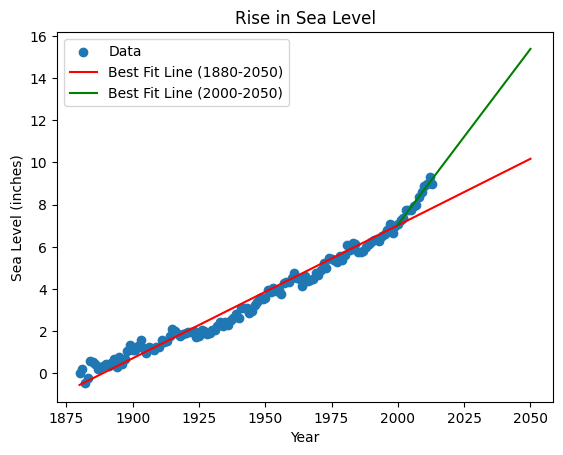

In [11]:
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Data")
plt.plot(years_extended, sea_levels_pred, 'r', label="Best Fit Line (1880-2050)")
plt.plot(years_recent, sea_levels_recent_pred, 'g', label="Best Fit Line (2000-2050)")
plt.legend()
plt.savefig("sea_level_plot.png")

Enregistrement et affichage de plot 

<Figure size 640x480 with 0 Axes>